This example implements the first model from "Modeling civil violence: An agent-based computational approach," by Joshua Epstein.  The paper (pdf) can be found [here](http://www.uvm.edu/~pdodds/files/papers/others/2002/epstein2002a.pdf).

The model consists of two types of agents: "Citizens" (called "Agents" in the paper) and "Cops."  Agents decide whether or not to rebel by weighing their unhappiness ('grievance') against the risk of rebelling, which they estimate by comparing the local ratio of rebels to cops.  




In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

from epstein_civil_violence.agent import Citizen, Cop
from epstein_civil_violence.model import EpsteinCivilViolence

In [9]:
model = EpsteinCivilViolence(
    height=40,
    width=40,
    citizen_density=0.7,
    cop_density=0.074,
    citizen_vision=7,
    cop_vision=7,
    legitimacy=0.8,
    max_jail_term=1000,
    max_iters=1000,
    media_density=0.0
)  # cap the number of steps the model takes
model.run_model()

The model's data collector counts the number of citizens who are Active (in rebellion), Jailed, or Quiescent after each step.

In [10]:
model_out = model.datacollector.get_model_vars_dataframe()

In [13]:
model_out

,Quiescent,Active,Jailed
0,1156,0,0
1,720,411,25
2,693,391,72
3,678,361,117
4,665,350,141
...,...,...,...
997,581,79,496
998,582,77,497
999,580,76,500
1000,581,77,498


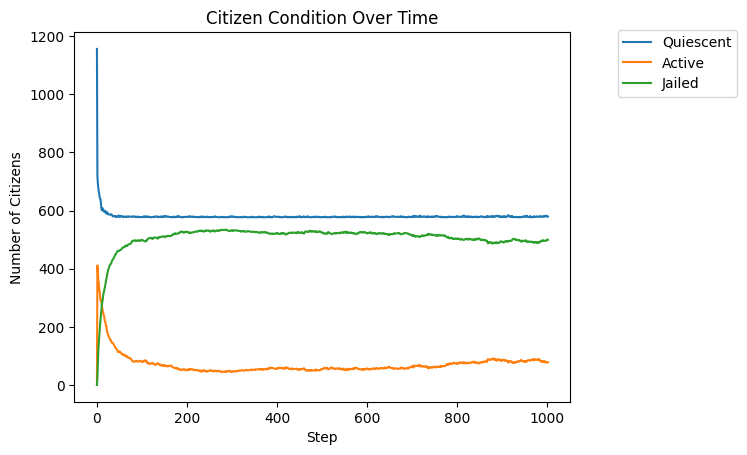

In [14]:
ax = model_out.plot()
ax.set_title("Citizen Condition Over Time")
ax.set_xlabel("Step")
ax.set_ylabel("Number of Citizens")
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

In [ ]:
# graph of steady state quiescent/active/jailed for different values of media density